# ゼロの多い統計データのはなし -statsmodelを添えて-

こんにちは。EEIC2012→IST2014のgirlydammyです。よろしくお願いします。だみ〜って読んで下さい。本名知ってる人は本名で呼んでください。

新卒で半年だけ某SI企業に務めましたが、仕事が面白くなさすぎて辞めて、今の会社が拾ってくれて毎日ハッピーにデータ解析のお仕事をやっています。
人はわたしのことを物理屋崩れのアウトロー野郎と呼びます。嘘です。


本当は量子アニーリングのことを書こうと思ったのですが、論文通りのシミュレーションで結果が喜ばしくなかったのでバグってる可能性も捨てきれず、塩漬けしました。
バグ取りとか考えるともうちょっと時間長めに取るべきでしたね。
私の人生はだいたいそんな感じです。竜頭蛇尾というか。人生自体も竜頭蛇尾で個々のイベントの時系列を見ても竜頭蛇尾みたいな。階層構造だ。

今日は本職になって三ヶ月目であるところの統計のお話をしましょう。
大学六年間も通って書くのがやってみた系Advent Calenderになってしまうのは心苦しいですがお許しください。
"へえ〜こんなんでデータサイエンティストやれるんや　うちもなったろ"という方は連絡お待ちしております。頑張って上司につなぎます。

さて、IT企業で解析をやっていると、ものすご0が多いデータなんかにたまに出くわします。
そういうときにどういう分析をやるかについて今日はちょっとお話します。


# 使うデータについて


https://data.qld.gov.au/dataset/crash-data-from-queensland-roads/resource/dd13a889-2a48-4b91-8c64-59f824ed3d2c
を使用します。

交通事故のデータです。

中身を見ましょう。



In [1]:
#いつもの
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('driverdemographics.csv')

In [3]:
df

,Crash_Year,Crash_Police_Region,Crash_Severity,Involving_Male_Driver,Involving_Female_Driver,Involving_Young_Driver_16-24,Involving_Senior_Driver_60plus,Involving_Provisional_Driver,Involving_Overseas_Licensed_Driver,Involving_Unlicensed_Driver,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
0,2001,Brisbane,Fatal,No,No,No,No,No,No,No,1,1,0,0,0,1
1,2001,Brisbane,Fatal,No,Yes,No,No,No,No,No,5,5,1,0,0,6
2,2001,Brisbane,Fatal,No,Yes,No,Yes,No,No,No,4,4,0,2,0,6
3,2001,Brisbane,Fatal,No,Yes,No,Yes,No,No,Yes,1,1,0,0,0,1
4,2001,Brisbane,Fatal,No,Yes,No,Yes,Yes,No,No,1,1,1,0,0,2
5,2001,Brisbane,Fatal,No,Yes,Yes,No,No,No,No,1,1,1,0,0,2
6,2001,Brisbane,Fatal,No,Yes,Yes,No,Yes,No,No,2,2,0,1,0,3
7,2001,Brisbane,Fatal,Yes,No,No,No,No,No,No,9,10,0,0,0,10
8,2001,Brisbane,Fatal,Yes,No,No,No,No,No,Yes,5,5,3,0,0,8
9,2001,Brisbane,Fatal,Yes,No,No,No,Yes,No,No,2,3,0,0,0,3


要は事故のデータで、怪我の度合いでランクが5つあって、事故に関わった運転手のデモグラがくっついてるみたいなデータです。
さて、興味があるのは0が多いデータなので、0を数えましょう。

In [4]:
df[df==0].count()

Crash_Year                               0
Crash_Police_Region                      0
Crash_Severity                           0
Involving_Male_Driver                    0
Involving_Female_Driver                  0
Involving_Young_Driver_16-24             0
Involving_Senior_Driver_60plus           0
Involving_Provisional_Driver             0
Involving_Overseas_Licensed_Driver       0
Involving_Unlicensed_Driver              0
Count_Crashes                            0
Count_Casualty_Fatality               9996
Count_Casualty_Hospitalised           7772
Count_Casualty_MedicallyTreated       6864
Count_Casualty_MinorInjury            6394
Count_Casualty_All                    2475
dtype: int64

いい感じにゼロが多そうなので、今回の目標は、Count_Crashを母集団として、Casualty Fatality(命に関わる死傷者)が生じるのに効いたInvolving_hogehogeなど(あとyearとregionね)は何か、ということにしましょう。

In [5]:
#とりあえず眺める
df.describe()

,Crash_Year,Count_Crashes,Count_Casualty_Fatality,Count_Casualty_Hospitalised,Count_Casualty_MedicallyTreated,Count_Casualty_MinorInjury,Count_Casualty_All
count,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000,11180.000000
mean,2006.377102,22.853131,0.383721,7.249374,7.700268,4.702952,20.036315
std,3.521700,47.511193,1.933315,28.676521,29.434842,16.569880,45.601295
min,2001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2006.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2009.000000,21.000000,0.000000,1.000000,2.000000,2.000000,14.000000
max,2015.000000,485.000000,42.000000,465.000000,480.000000,318.000000,513.000000


In [6]:
#適当に前処理
pd.get_dummies(df['Crash_Police_Region'])
df = df.replace('Yes',1)
df = df.replace('No',0)
y1 = list(range(2001,2016,1))
y2 = list(range(1,16,1))
for (i,j) in zip(y1,y2):   
    df.replace(i,j)
df[['Brisbane','Central','Northern','South Eastern','Southern','Unknown']] = pd.get_dummies(df['Crash_Police_Region'])
df['Const'] = sm.add_constant(df.Brisbane)['const']

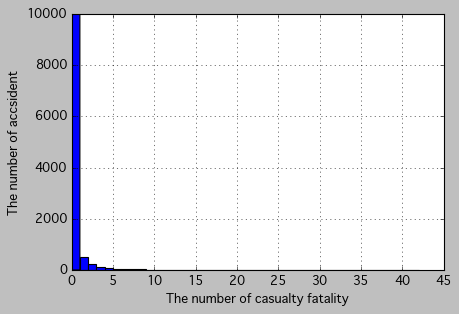

In [7]:
#適当に可視化
fig,ax = plt.subplots(1,1)
df['Count_Casualty_Fatality'].hist(bins=df['Count_Casualty_Fatality'].max())
ax.set_xlabel('The number of casualty fatality')
ax.set_ylabel('The number of accsident')

# poisson regression


いい感じにゼロが多そうで安心しましたね。
さてさて、次は回帰に入りましょう。
まず、ポアソン回帰というやつをやります。

まあ、事故の記録を見る限りだと、だいたい事故は一日二件くらい起こるみたいです。
11180/365/15=2.0420...です。
ということは、半日に一回事故が起こるわけです。これを単位時間としましょう。
本当は、事故の発生自体もいかにもポアソン分布に従いそうなので、この仮定は微妙ですが。

ポアソン分布が満たすべき条件を考えましょう。

http://next1.msi.sk.shibaura-it.ac.jp/MULTIMEDIA/probans/node14.html

にまとまってました。

- まあ人はいつでも死にそうですよね。ランダムに発生しそうです。
- あの時事故で死んだ人数のせいでこの事故で死んだ人数が変化する……事故に関わった人物に共通の近しい知り合いがいたら疑ったほうがいいでしょう。
- 切り出した時間の短さと比例して死ににくくなるでしょうか？まあ、比例以外の関係を仮定するのも難しそうだし、そうしましょう。
- 時間を極端に短く取ると同時多発的に別の事故のせいで人が死ぬことはない……これは単位時間の半日より短くするとそうなりそうですね。
- 単位時間あたりに平均$\lambda$人死んで、それは5以下。それはデータをみるとそんな感じですね。

色々言い訳をしましたが、とりあえずまあ、Casualty Fatalityの数$X$は、ポアソン分布に従うと思ってみます。
言い換えれば、ある事故のCasualty Fatalityの数$X$は平均$\lambda$人で、分散$\lambda$人だとします。


そうすると、ある事故のCasualty Fatalityの数$X$が$k$人である確率は、次のように書けます。

$$P(X = k) = \frac{\lambda^{k} e^{-\lambda}}{k!}$$

$l$番目の事故についてのパラメータ$\lambda_{l}$は、その事故の特徴量$d_i$や$r_i$と、次の関係が存在しているとする。

$${\rm log}(\lambda_{l}) = \sum_{i=1}^{N} \beta_{i} d_{i} + \sum_{i=1}^{M} \beta_{N+i} r_{i}$$

平たくいうと、その事故に関わった運転手が男だった場合$d_{Involving　Male　Driver} = 1$になって、$\beta_{Involving　Male　Driver}$の正負で平均人数$\lambda$が大きくなったり小さくなったりしろ、ということを要請しています。

ただその効果は上のモデルだと俺は思っちゃうことにするぜ！という話です。

長々と喋りましたが、次のように簡単にできちゃいます。

In [8]:
#ポアソン回帰
fam = sm.families.Poisson()
y = df['Count_Casualty_Fatality']
X = df[['Crash_Year','Involving_Male_Driver',
                                                        'Involving_Female_Driver',
                                                        'Involving_Young_Driver_16-24',
                                                       'Involving_Senior_Driver_60plus',
                                                       'Involving_Provisional_Driver',
                                                       'Involving_Overseas_Licensed_Driver',
                                                       'Involving_Unlicensed_Driver',
                                                        'Brisbane',
                                                     'Central',
                                                     'Northern',
                                                     'South Eastern',
                                                     'Southern',
                                                     'Unknown',
                                                     'Const']]
model1 = sm.GLM(y,X,family=fam)
result1 = model1.fit()
print(result1.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Count_Casualty_Fatality   No. Observations:                11180
Model:                                 GLM   Df Residuals:                    11166
Model Family:                      Poisson   Df Model:                           13
Link Function:                         log   Scale:                             1.0
Method:                               IRLS   Log-Likelihood:                -10002.
Date:                     Fri, 09 Dec 2016   Deviance:                       16750.
Time:                             01:18:48   Pearson chi2:                 3.85e+04
No. Iterations:                         10                                         
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Crash_Year                            

In [9]:
#aic/bicを計算 model間でいい感じかどうかの比較をするための数値　使えるかどうかは場合によるので注意　教科書を読みながらやろう
print('aic: ',result1.aic)
print('bic: ',result1.bic)

aic:  20031.3491438
bic:  -87337.7581945


In [10]:
#muには回帰結果が入っていることを確認
print(result1.mu[0],np.exp((result1.params.values*X.ix[0].values).sum()),y[0])

0.557959236738 0.557959236738 1


In [11]:
#Unknownが微妙なので場所が入ってないやつもやる
fam = sm.families.Poisson()
y = df['Count_Casualty_Fatality']
X = df[['Crash_Year','Involving_Male_Driver',
                                                        'Involving_Female_Driver',
                                                        'Involving_Young_Driver_16-24',
                                                       'Involving_Senior_Driver_60plus',
                                                       'Involving_Provisional_Driver',
                                                       'Involving_Overseas_Licensed_Driver',
                                                       'Involving_Unlicensed_Driver']]
model1 = sm.GLM(y,X,family=fam)
result1_2 = model1.fit()
print(result1.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Count_Casualty_Fatality   No. Observations:                11180
Model:                                 GLM   Df Residuals:                    11166
Model Family:                      Poisson   Df Model:                           13
Link Function:                         log   Scale:                             1.0
Method:                               IRLS   Log-Likelihood:                -10002.
Date:                     Fri, 09 Dec 2016   Deviance:                       16750.
Time:                             01:18:48   Pearson chi2:                 3.85e+04
No. Iterations:                         10                                         
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Crash_Year                            

In [12]:
print('aic: ',result1.aic)
print('bic: ',result1.bic)
print('aic: ',result1_2.aic)
print('bic: ',result1_2.bic)
#どうも場所が入ってるほうがよいみたいだ

aic:  20031.3491438
bic:  -87337.7581945
aic:  21052.3880295
bic:  -86363.7203197


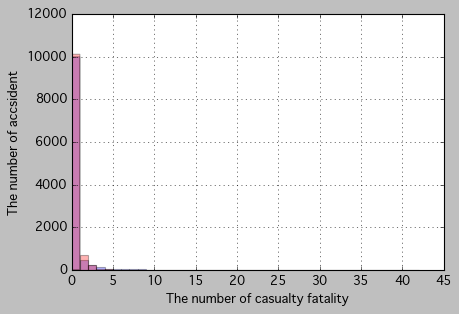

In [13]:
#待望の可視化
fig,ax = plt.subplots(1,1)
df['Count_Casualty_Fatality'].hist(bins = max(df['Count_Casualty_Fatality']),alpha=0.3)
dfbuf = pd.DataFrame()
dfbuf['mu'] = result1.mu
dfbuf['mu'].hist(color='r',alpha=0.3,bins=max(df['Count_Casualty_Fatality']),range=(0,max(df['Count_Casualty_Fatality'])))
ax.set_xlabel('The number of casualty fatality')
ax.set_ylabel('The number of accsident')

なんということでしょう。
回帰できてしまっている感じがしますね。
場所が不明(Unknown)以外はみんなP>|z|が0.000なので、特徴量もほとんど文句なさそうです。
しかし、これじゃネタになりません。

In [14]:
#唐突に平均と分散を計算しはじめる
print(result1.mu.mean())
print(result1.mu.var())
print(df['Count_Casualty_Fatality'].values.mean())
print(df['Count_Casualty_Fatality'].values.var())

0.383721295691
0.410290628374
0.383720930233
3.73737363232


計算してみると、どうも元データは分散が大きいようです。本当は最初に気づくべきですね。こういうデータの性質を過分散、overdispersionといいます。

ポアソン分布は平均も分散も$\lambda$になってくれるという性質があるので、そもそもポアソン分布で説明すんのちょっと微妙だな〜と思い始めましょう。繰り返しますが、本当は最初に気づくべきです。本来は平均も分散も近しい値っぽいしポアソン分布じゃね？と思うのが筋だそうです。

あとまあ、一個の分布だけでフィッティングしてなんか回帰できてるっぽいしオッケー♡というのもアホっぽいですね。ちなみに僕はそういうとこあります。

幾つか言い訳もたったことですし、過分散を補償できると噂の負の二項分布での回帰を考えましょう。

ここで死亡者数が死ぬメカニズムが負の二項分布に従う理由を考えるのがつらすぎたので、今回は過分散を補償してくれるということのみをあてに使います。

このスライドが超絶わかりやすいです。感謝の意をこめてrefでどこから見たかがわかるようにしてます。ネットのマナー的にどうなのかはわかんないです。

http://www.slideshare.net/simizu706/ss-50994149?ref=http://d.hatena.ne.jp/hoxo_m/20151012/p1

$\lambda$それ自体にも確率分布を考えてそれがガンマ分布に従うとかんがえてみましょう。

個人的には操作的に見るのがわかりやすくって、p11の積分の式を見ると、$\lambda$の確率分布を考えて、$\lambda$を積分消去して代わりに$\phi$と$\mu$というパラメタを導入してる感じです。
参考にここに打たせてもらいます。

$$p(X|\phi,\mu) = \int_{0}^{\inf}Poi(X|\lambda)Gam(\lambda|\phi,\mu)d\lambda $$

さてさて、ガンマ分布って何よというと、平均3個/年壊れるコップを12個壊すまでの時間がこうなるよねという話だそうです。

http://www.f-denshi.com/000TokiwaJPN/17kakto/110prob.html

それを理解するためにはまず指数分布を理解しなければならないそうです。

指数分布って何よというと、

http://mathtrain.jp/expdistribution

にあります。どうでもいいですが、ここの管理人さんは私の高校/大学の同級生で、高校トップでした。わたし？わたしは模試とか実力テストは160人中10番台をうろちょろしてました。唐突な自分語りで恐縮ですが、私の通っていた高校の合格のKPIは高校生活で受けた定期テストと実力テストの全合計点数でした。それがKPIに選ばれたプロセスが気になりますね。私は定期テストはいつも160人中70番台とかだったので、KPIをぶち壊した事になります。やったぜ。ちなみにその後、定期テストで勉強をする習慣がつかないまま大学に入り、定期テストの点で振り分けが行われるので当然ぼろくそになり、行き場もなく友達が行くという理由でeeicに拾ってもらい、今に至ります。eeicが人気学科になった今からすると信じられないかもしれませんが。

まあ与太話はさておき、指数分布とはランダムイベントが以前起きてからまた起きるまでの時間の分布だそうです。
ああなるほど、じゃあときわ台学の操作は$\frac{1}{\mu}$の時間で平均的に1個壊れるコップを、1個ずつ壊していって2個壊れるまでの分布の計算をやってから、帰納法で壊れるコップを$\phi$個に拡張してるんだなという気持ちがわかります。

そういう現象を表現するガンマ分布の式は以下のようになるそうです。ここでは上の式と合わせるために確率変数を$\lambda$に取ります。

$$f(\lambda) = \lambda^{\phi-1} \frac{e^{\frac{-\lambda}{\mu}}}{\Gamma(\phi)\mu^{\phi}} $$

ここで$\phi$は壊れる回数で$\mu$は単位時間あたりに平均的に壊れる個数です。
あとは上の式を上の上の式にぶち込めば$p(X)$の右辺が負の二項分布になります。めでたしめでたし。

こんがらがったのでお話をまとめましょう。
-  負の二項分布は過分散を補償できるらしい
-  それは$\lambda$がガンマ分布$Gam(\lambda|\phi,\mu)$に従うとすれば導出できるらしい
-  ガンマ分布は上で述べたような分布らしい
-  ぶちこんで積分すれば二項分布になるらしい
ということがここまででわかりました。

とにかくこれですべてオッケーなのは、一番最初のスライドを見ると、これからは事故での死亡人数が平均$\mu$で分散$\mu + \frac {\mu^2}{\phi}$の分布を使用できるぜ、やったぜという話です。

やってみましょう。

In [15]:
#alpha=phiであることに留意
fam = sm.families.NegativeBinomial(alpha=0.1)
y = df['Count_Casualty_Fatality']
X = df[['Crash_Year','Involving_Male_Driver',
                                                        'Involving_Female_Driver',
                                                        'Involving_Young_Driver_16-24',
                                                       'Involving_Senior_Driver_60plus',
                                                       'Involving_Provisional_Driver',
                                                       'Involving_Overseas_Licensed_Driver',
                                                       'Involving_Unlicensed_Driver',
                                                        'Brisbane',
                                                     'Central',
                                                     'Northern',
                                                     'South Eastern',
                                                     'Southern',
                                                     'Unknown',
                                                     'Const']]
model2 = sm.GLM(y,X,family=fam)
result2 = model2.fit()
print(result2.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Count_Casualty_Fatality   No. Observations:                11180
Model:                                 GLM   Df Residuals:                    11166
Model Family:             NegativeBinomial   Df Model:                           13
Link Function:                         log   Scale:                   3.14319296818
Method:                               IRLS   Log-Likelihood:                -9009.5
Date:                     Fri, 09 Dec 2016   Deviance:                       14443.
Time:                             01:18:50   Pearson chi2:                 3.51e+04
No. Iterations:                         27                                         
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Crash_Year                            

なんか場所が悪さしてますね。抜きましょう。

In [16]:
phi = 0.04355 #ここは実は結果をみながら手動で最適化　まじかよって感じ
fam = sm.families.NegativeBinomial(alpha=phi)
y = df['Count_Casualty_Fatality']
X = df[['Crash_Year','Involving_Male_Driver',
                                                        'Involving_Female_Driver',
                                                        'Involving_Young_Driver_16-24',
                                                       'Involving_Senior_Driver_60plus',
                                                       'Involving_Provisional_Driver',
                                                       'Involving_Overseas_Licensed_Driver',
                                                       'Involving_Unlicensed_Driver',
                                                     'Const']]
model2 = sm.GLM(y,X,family=fam)
result2 = model2.fit()
print(result2.summary())

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Count_Casualty_Fatality   No. Observations:                11180
Model:                                 GLM   Df Residuals:                    11171
Model Family:             NegativeBinomial   Df Model:                            8
Link Function:                         log   Scale:                   3.80617262196
Method:                               IRLS   Log-Likelihood:                -9876.8
Date:                     Fri, 09 Dec 2016   Deviance:                       16341.
Time:                             01:18:50   Pearson chi2:                 4.25e+04
No. Iterations:                          9                                         
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Crash_Year                            

In [17]:
print(np.exp((result2.params*X).transpose().sum()[0]),result2.mu[0])

0.728936030636 0.728936030636


In [18]:
print('aic: ',result2.aic)
print('bic: ',result2.bic)

aic:  19771.5086225
bic:  -87794.1133925


In [19]:
print(result2.mu.mean())
print(result2.mu.mean() + result2.mu.mean()*result2.mu.mean()/phi)
print(df['Count_Casualty_Fatality'].values.mean())
print(df['Count_Casualty_Fatality'].values.var())

0.382226928641
3.73693243905
0.383720930233
3.73737363232


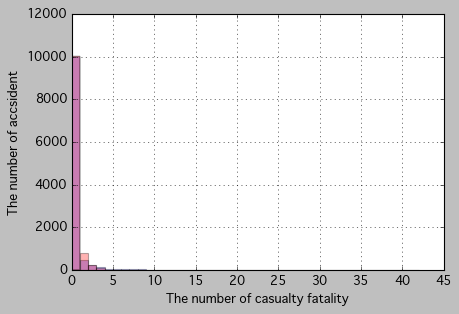

In [20]:
fig,ax = plt.subplots(1,1)
df['Count_Casualty_Fatality'].hist(bins = max(df.Count_Casualty_Fatality),alpha=0.3)
dfbuf = pd.DataFrame()
dfbuf['mu'] = result2.mu
dfbuf['mu'].hist(color='r',alpha=0.3,bins=max(df.Count_Casualty_Fatality),range=(0,max(df.Count_Casualty_Fatality)))
ax.set_xlabel('The number of casualty fatality')
ax.set_ylabel('The number of accsident')

In [21]:
print('poisson aic: ',result1.aic)
print('poisson bic: ',result1.bic)
print('negbi aic: ',result2.aic)
print('negbi bic: ',result2.bic)

poisson aic:  20031.3491438
poisson bic:  -87337.7581945
negbi aic:  19771.5086225
negbi bic:  -87794.1133925


なんと！過分散を補償できてますね！
本当はここからさらにzero-inflated poissonというのをやってみるつもりでしたが、llfの最適化まわりがうまく動かせなかったのでやめました。年末に追加更新するかもしれません。
ということでシメに入りましょう。

# おわりに

さて、いかがでしたでしょうか。実は交通事故の死亡者数はポアソン分布でよく説明できるというのは鉄板みたいです。ごろごろ出てきますのでね。
それでも、モデルを変更すると、AICがよくなったりして、へえ〜案外、分布とか色々考えてみるのも大事なんだなあということが言えたと思います。

個人的には、統計の楽しさは、後ろのメカニズムを考える楽しさと、パッケージを叩いて道具を使いこなす楽しさと、可視化しておうおうよう当てはまっとるやんけという楽しさです。

もちろん、その過程でたくさん間違えるでしょうし、パッケージを読んでどういうコードなのか理解するのは辛いし、この記事も間違いを含んでいると思います。
それでも、不確かな世界をすこしでも説明しにゆくその行為自体が尊く、かつ世の中を理解し、その知見で豊かにするというモットーもまた尊く、何よりその結果で世の中をバリバリよくしたいのです。

こういうの楽しそう〜って思った人は適当に連絡ください。
@girlydammyより愛をこめて。